In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

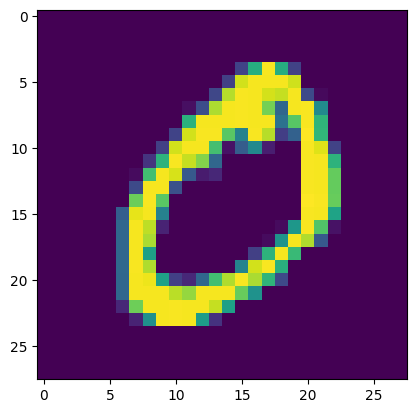

In [4]:
plt.imshow(X_train[1])

In [5]:
y_train[1]

0

In [6]:
only_zeros = X_train[y_train==0]

In [7]:
only_zeros.shape

(5923, 28, 28)

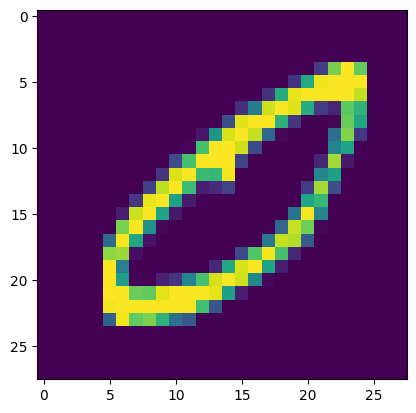

In [9]:
plt.imshow(only_zeros[101])

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Reshape,Flatten

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100

In [13]:
generator = Sequential()
generator.add(Dense(100, activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='sigmoid'))
generator.add(Reshape([28,28]))

In [14]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [15]:
GAN = Sequential([generator,discriminator])

In [16]:
discriminator.trainable = False

In [17]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
GAN.layers

In [19]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28)            143634    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 132951    
                                                                 
Total params: 276,585
Trainable params: 143,634
Non-trainable params: 132,951
_________________________________________________________________


In [20]:
GAN.layers[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 784)               118384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [21]:
GAN.layers[1].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 150)               117750    
                                                                 
 dense_4 (Dense)             (None, 100)               15100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________
